In [1]:
!which python
!pwd
!python --version

/Users/ratanprakash/Desktop/WhatsApp-chat-analyser/chat-analyser/bin/python
/Users/ratanprakash/Desktop/WhatsApp-chat-analyser
Python 3.12.5


In [3]:
import datetime
time = datetime.datetime.now()
time = time.strftime("%Y-%m-%d %H:%M:%S")
print(time)

2024-09-23 23:27:43


## Whatsapp Chat Analysis

In [19]:
import re
import pandas as pd

In [20]:
chat_file = open("WhatsApp Chat with CPians.txt", "r", encoding="utf-8")

In [21]:
chat_data = chat_file.read()

In [22]:
print(chat_data[:1000])

2/18/24, 8:40 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
2/18/24, 8:40 PM - Naveen Solanki created group "CPians"
2/18/24, 8:40 PM - Naveen Solanki added you
2/18/24, 8:41 PM - Sagar Yadav joined using this group's invite link
2/18/24, 8:42 PM - Sidharth Gill joined using this group's invite link
2/18/24, 9:15 PM - Naveen Solanki: <Media omitted>
2/18/24, 9:15 PM - Naveen Solanki: ye tourist ka submission hai 1st question ka
2/18/24, 9:16 PM - Naveen Solanki: DP lagayi hai saale ne😂
2/18/24, 9:17 PM - Sidharth Gill: Dp to aati hi nhi
2/18/24, 9:17 PM - Ratan Prakash: Aayein
2/18/24, 9:17 PM - Naveen Solanki: abe bina dp ke bhi ho jayega vo question
2/18/24, 9:18 PM - Sidharth Gill: when you have too much brain
2/18/24, 9:18 PM - Naveen Solanki: @918801868771 @919205378025
2/18/24, 9:18 PM - Naveen Solanki: 🙂
2/18/24, 9:18 PM - Naveen Solanki: nhi bhai , ratan se ho gaya toh brain ki re

In [23]:
# re pattern to extract date and time 
date_time_pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s'
messages = re.split(date_time_pattern, chat_data)[1:]
print(messages[:10])
date_times = re.findall(date_time_pattern, chat_data)
print(date_times[:10])

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', 'Naveen Solanki created group "CPians"\n', 'Naveen Solanki added you\n', "Sagar Yadav joined using this group's invite link\n", "Sidharth Gill joined using this group's invite link\n", 'Naveen Solanki: <Media omitted>\n', 'Naveen Solanki: ye tourist ka submission hai 1st question ka\n', 'Naveen Solanki: DP lagayi hai saale ne😂\n', 'Sidharth Gill: Dp to aati hi nhi\n', 'Ratan Prakash: Aayein\n']
['2/18/24, 8:40\u202fPM - ', '2/18/24, 8:40\u202fPM - ', '2/18/24, 8:40\u202fPM - ', '2/18/24, 8:41\u202fPM - ', '2/18/24, 8:42\u202fPM - ', '2/18/24, 9:15\u202fPM - ', '2/18/24, 9:15\u202fPM - ', '2/18/24, 9:16\u202fPM - ', '2/18/24, 9:17\u202fPM - ', '2/18/24, 9:17\u202fPM - ']


In [24]:
df = pd.DataFrame({'date_time': date_times, 'message': messages})
df.head()

,date_time,message
0,"2/18/24, 8:40 PM -",Messages and calls are end-to-end encrypted. N...
1,"2/18/24, 8:40 PM -","Naveen Solanki created group ""CPians""\n"
2,"2/18/24, 8:40 PM -",Naveen Solanki added you\n
3,"2/18/24, 8:41 PM -",Sagar Yadav joined using this group's invite l...
4,"2/18/24, 8:42 PM -",Sidharth Gill joined using this group's invite...


In [25]:
# Replace non-breaking space with regular space
df['date_time'] = df['date_time'].str.replace('\u202f', ' ')
df['date_time'] = pd.to_datetime(df['date_time'], format='%m/%d/%y, %I:%M %p - ')
df.head()

,date_time,message
0,2024-02-18 20:40:00,Messages and calls are end-to-end encrypted. N...
1,2024-02-18 20:40:00,"Naveen Solanki created group ""CPians""\n"
2,2024-02-18 20:40:00,Naveen Solanki added you\n
3,2024-02-18 20:41:00,Sagar Yadav joined using this group's invite l...
4,2024-02-18 20:42:00,Sidharth Gill joined using this group's invite...


In [26]:
df.shape

(9932, 2)

In [27]:
original_df = df.copy()

In [28]:
df.head(20)

,date_time,message
0,2024-02-18 20:40:00,Messages and calls are end-to-end encrypted. N...
1,2024-02-18 20:40:00,"Naveen Solanki created group ""CPians""\n"
2,2024-02-18 20:40:00,Naveen Solanki added you\n
3,2024-02-18 20:41:00,Sagar Yadav joined using this group's invite l...
4,2024-02-18 20:42:00,Sidharth Gill joined using this group's invite...
5,2024-02-18 21:15:00,Naveen Solanki: <Media omitted>\n
6,2024-02-18 21:15:00,Naveen Solanki: ye tourist ka submission hai 1...
7,2024-02-18 21:16:00,Naveen Solanki: DP lagayi hai saale ne😂\n
8,2024-02-18 21:17:00,Sidharth Gill: Dp to aati hi nhi\n
9,2024-02-18 21:17:00,Ratan Prakash: Aayein\n


In [34]:
df = original_df.copy()

In [35]:
#separate users and their corresponding messages
users = []
messages = []
i = 0
for message in df['message']:
    entry = re.split('([\w\W]+?):\s', message)
    print(entry)
    # if i > 20:
    #     break
    # i += 1
    if len(entry) > 1:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages

df.head()

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
/var/folders/23/xnk_h1gj4t374j4cnh56sxwc0000gn/T/ipykernel_14555/442485802.py:6: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s', message)


['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n']
['Naveen Solanki created group "CPians"\n']
['Naveen Solanki added you\n']
["Sagar Yadav joined using this group's invite link\n"]
["Sidharth Gill joined using this group's invite link\n"]
['', 'Naveen Solanki', '<Media omitted>\n']
['', 'Naveen Solanki', 'ye tourist ka submission hai 1st question ka\n']
['', 'Naveen Solanki', 'DP lagayi hai saale ne😂\n']
['', 'Sidharth Gill', 'Dp to aati hi nhi\n']
['', 'Ratan Prakash', 'Aayein\n']
['', 'Naveen Solanki', 'abe bina dp ke bhi ho jayega vo question\n']
['', 'Sidharth Gill', 'when you have too much brain\n']
['', 'Naveen Solanki', '@918801868771 @919205378025\n']
['', 'Naveen Solanki', '🙂\n']
['', 'Naveen Solanki', 'nhi bhai , ratan se ho gaya toh brain ki requirement toh nhi h\n']
['', 'Naveen Solanki', 'aur sahil ne maa chod di pyaar se iski\n']
['', 'Sidharth Gill', 'nice ,bhai ratan ko toda 

,date_time,message,user
0,2024-02-18 20:40:00,Messages and calls are end-to-end encrypted. N...,group_notification
1,2024-02-18 20:40:00,"Naveen Solanki created group ""CPians""\n",group_notification
2,2024-02-18 20:40:00,Naveen Solanki added you\n,group_notification
3,2024-02-18 20:41:00,Sagar Yadav joined using this group's invite l...,group_notification
4,2024-02-18 20:42:00,Sidharth Gill joined using this group's invite...,group_notification


In [36]:
df.head(20)

,date_time,message,user
0,2024-02-18 20:40:00,Messages and calls are end-to-end encrypted. N...,group_notification
1,2024-02-18 20:40:00,"Naveen Solanki created group ""CPians""\n",group_notification
2,2024-02-18 20:40:00,Naveen Solanki added you\n,group_notification
3,2024-02-18 20:41:00,Sagar Yadav joined using this group's invite l...,group_notification
4,2024-02-18 20:42:00,Sidharth Gill joined using this group's invite...,group_notification
5,2024-02-18 21:15:00,<Media omitted>\n,Naveen Solanki
6,2024-02-18 21:15:00,ye tourist ka submission hai 1st question ka\n,Naveen Solanki
7,2024-02-18 21:16:00,DP lagayi hai saale ne😂\n,Naveen Solanki
8,2024-02-18 21:17:00,Dp to aati hi nhi\n,Sidharth Gill
9,2024-02-18 21:17:00,Aayein\n,Ratan Prakash


In [54]:
# extract date month year hour and minute from date_time
df['date'] = df['date_time'].dt.date
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['minute'] = df['date_time'].dt.minute
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['weekday'] = df['date_time'].dt.weekday
df['weekday_en'] = df['weekday'].map({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})
df['month_en'] = df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
df.sample(20)

,date_time,message,user,date,time,hour,minute,day,month,year,weekday,weekday_en,month_en
1037,2024-03-01 22:54:00,<Media omitted>\n,Naveen Solanki,2024-03-01,22:54:00,22,54,1,3,2024,4,Fri,Mar
2354,2024-04-06 20:02:00,do the math bro\n,Naveen Solanki,2024-04-06,20:02:00,20,2,6,4,2024,5,Sat,Apr
5249,2024-08-02 23:54:00,Terko bhi to aaya hoga bkl\n,Vibhinn BKL,2024-08-02,23:54:00,23,54,2,8,2024,4,Fri,Aug
3488,2024-05-20 21:02:00,*Up and running guys* \nFixed few more things ...,Ratan Prakash,2024-05-20,21:02:00,21,2,20,5,2024,0,Mon,May
1927,2024-03-26 18:06:00,Bc pehle ke contests me mai variable naam chan...,Sagar Yadav,2024-03-26,18:06:00,18,6,26,3,2024,1,Tue,Mar
2659,2024-04-13 19:51:00,ab lc par minus karwate he\n,Sahil Singh Tomar,2024-04-13,19:51:00,19,51,13,4,2024,5,Sat,Apr
9898,2024-09-21 14:12:00,ab chalega trip pe? *Jaipur* after midsems\n,Ratan Prakash,2024-09-21,14:12:00,14,12,21,9,2024,5,Sat,Sep
5456,2024-08-03 15:08:00,gpt ne hi 6 bataya\n,Sagar Yadav,2024-08-03,15:08:00,15,8,3,8,2024,5,Sat,Aug
9218,2024-09-04 13:01:00,Aur maine yaha bheji thi🫠😭\n,Vibhinn BKL,2024-09-04,13:01:00,13,1,4,9,2024,2,Wed,Sep
9017,2024-08-31 22:01:00,fr\n,Vibhinn BKL,2024-08-31,22:01:00,22,1,31,8,2024,5,Sat,Aug


In [ ]:
import emoji
from preprocessor import *
from collections import Counter

In [50]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
emojis
Counter(emojis)

Counter({'😂': 205,
         '😭': 130,
         '🥲': 57,
         '🏻': 45,
         '🙂': 40,
         '😔': 38,
         '🤣': 31,
         '❤': 31,
         '🔥': 27,
         '🥳': 26,
         '🙏': 21,
         '🤡': 20,
         '🫠': 17,
         '🥹': 16,
         '👍': 15,
         '🎉': 15,
         '🛐': 13,
         '🫡': 10,
         '😘': 9,
         '😞': 9,
         '🥱': 9,
         '👉': 8,
         '👈': 8,
         '🥺': 8,
         '💪': 7,
         '😢': 7,
         '💋': 7,
         '😡': 7,
         '🤧': 7,
         '🏼': 6,
         '🥰': 6,
         '🫵': 6,
         '💀': 6,
         '🧐': 5,
         '🥵': 5,
         '🫂': 4,
         '🤩': 4,
         '😵': 4,
         '😶': 4,
         '🤦': 4,
         '😎': 4,
         '😈': 4,
         '🏽': 4,
         '💕': 4,
         '☠': 4,
         '😏': 3,
         '😍': 3,
         '♂': 3,
         '🕺': 3,
         '🎼': 3,
         '🎵': 3,
         '🗿': 3,
         '🤤': 3,
         '💫': 3,
         '🥶': 3,
         '🫨': 3,
         '😤': 2,
         '🏾

# TIMELINE

In [61]:
timeline = df.groupby(['year', 'month', 'month_en'])['message'].count().reset_index()
timeline

,year,month,month_en,message
0,2024,2,Feb,760
1,2024,3,Mar,1531
2,2024,4,Apr,848
3,2024,5,May,366
4,2024,6,Jun,421
5,2024,7,Jul,1236
6,2024,8,Aug,3922
7,2024,9,Sep,848


In [62]:
timeline = timeline.rename(columns={'message': 'message_count'})
# sort the timeline by num of messages
# timeline = timeline.sort_values(by='message_count', ascending=False)
timeline

,year,month,month_en,message_count
0,2024,2,Feb,760
1,2024,3,Mar,1531
2,2024,4,Apr,848
3,2024,5,May,366
4,2024,6,Jun,421
5,2024,7,Jul,1236
6,2024,8,Aug,3922
7,2024,9,Sep,848


In [63]:
timeline['month_year'] = timeline['month_en'] + ' ' + timeline['year'].astype(str)
timeline

,year,month,month_en,message_count,month_year
0,2024,2,Feb,760,Feb 2024
1,2024,3,Mar,1531,Mar 2024
2,2024,4,Apr,848,Apr 2024
3,2024,5,May,366,May 2024
4,2024,6,Jun,421,Jun 2024
5,2024,7,Jul,1236,Jul 2024
6,2024,8,Aug,3922,Aug 2024
7,2024,9,Sep,848,Sep 2024


Text(0, 0.5, 'Number of Messages')

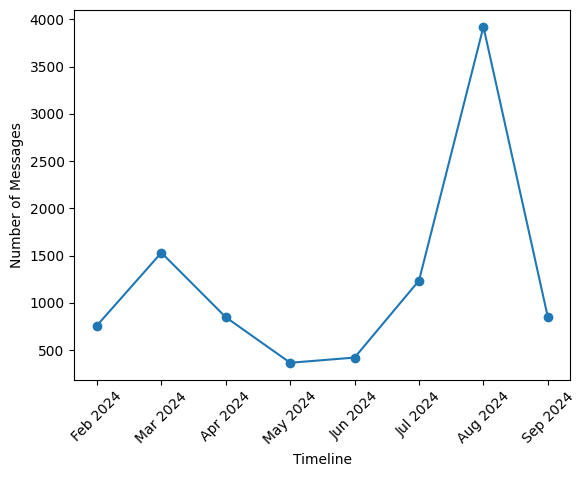

In [64]:
plt.plot(timeline['month_year'], timeline['message_count'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Timeline')
plt.ylabel('Number of Messages')


In [65]:
df['only_date'] = df['date_time'].dt.date
timeline_dt = df.groupby('only_date')['message'].count().reset_index()
timeline_dt = timeline_dt.rename(columns={'message': 'message_count'})
timeline_dt

,only_date,message_count
0,2024-02-18,93
1,2024-02-19,158
2,2024-02-20,73
3,2024-02-23,30
4,2024-02-24,43
...,...,...
143,2024-09-19,52
144,2024-09-20,35
145,2024-09-21,22
146,2024-09-22,12


<Figure size 2000x2000 with 0 Axes>

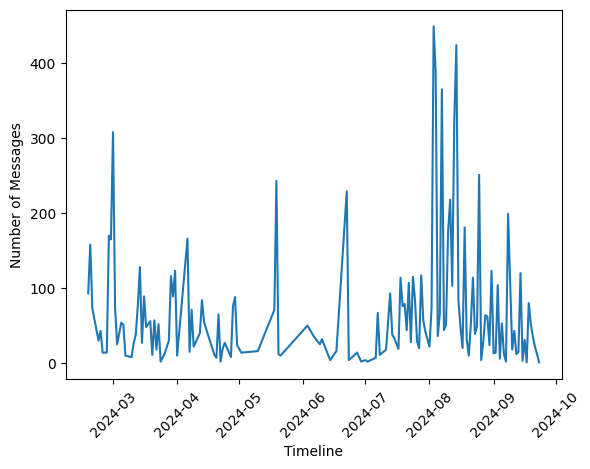

<Figure size 2000x2000 with 0 Axes>

In [ ]:

plt.plot(timeline_dt['only_date'], timeline_dt['message_count'])
plt.xticks(rotation=45)
plt.xlabel('Timeline')
plt.ylabel('Number of Messages')
plt.figure(figsize=(20, 20))

<Axes: xlabel='weekday_en'>

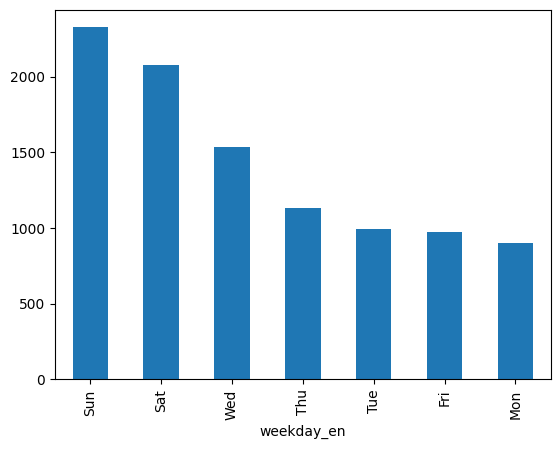

In [72]:
df['weekday_en'].value_counts().plot(kind='bar')

<Axes: xlabel='month_en'>

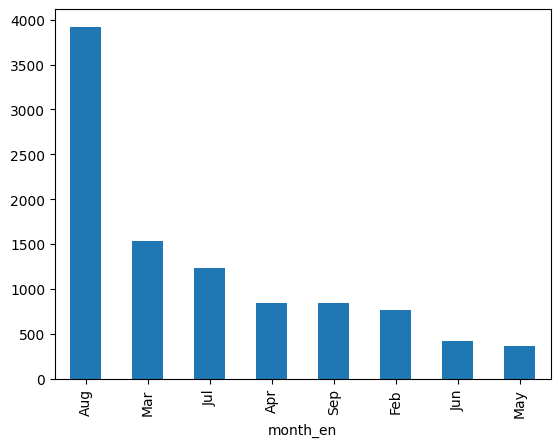

In [73]:
df['month_en'].value_counts().plot(kind='bar')

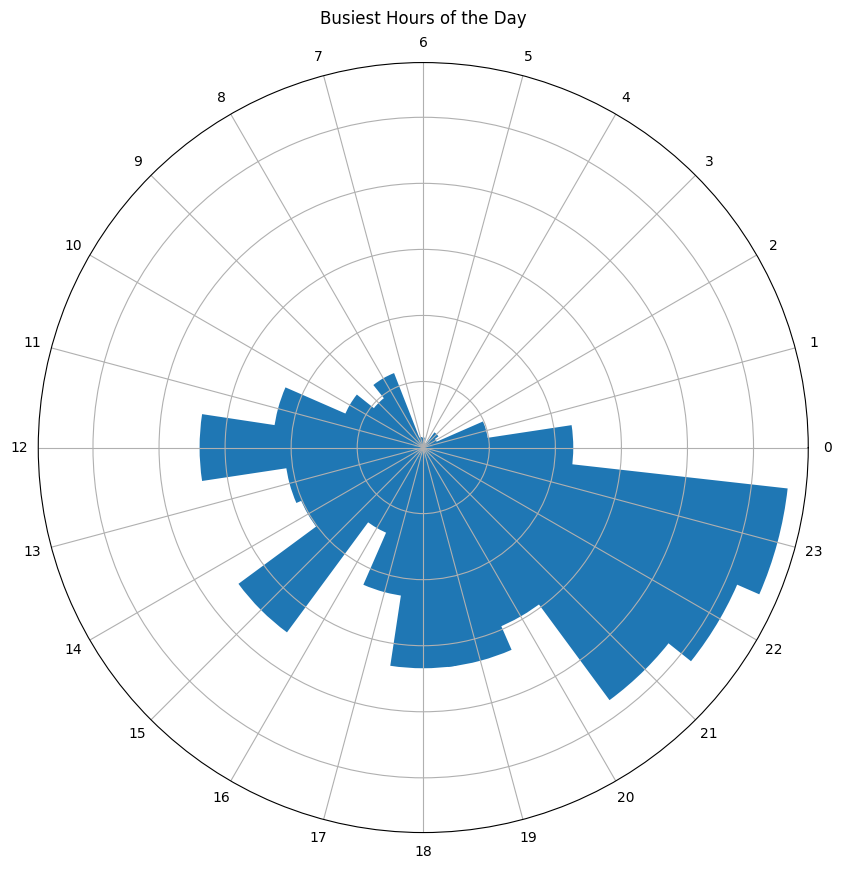

In [79]:
import numpy as np

import matplotlib.pyplot as plt

# Count the number of messages per hour
hour_counts = df['hour'].value_counts().sort_index()

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Convert hours to radians
hours = np.arange(24)
radians = 2 * np.pi * hours / 24

# Plot the data
bars = ax.bar(radians, hour_counts, width=0.3, bottom=0.2)

# Set the labels
ax.set_xticks(radians)
ax.set_xticklabels(hours)
ax.set_yticklabels([])

# Add a title
ax.set_title('Busiest Hours of the Day', va='bottom')

plt.show()

TypeError: float() argument must be a string or a real number, not 'Axes'

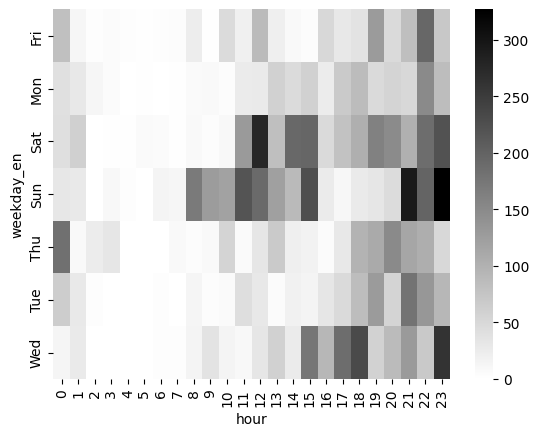

In [ ]:
import seaborn as sns

sns.heatmap(df.pivot_table(index='weekday_en', columns='hour', values='message', aggfunc='count', fill_value=0), cmap='gray_r')


Text(0.5, 1.0, 'Activity Heatmap')

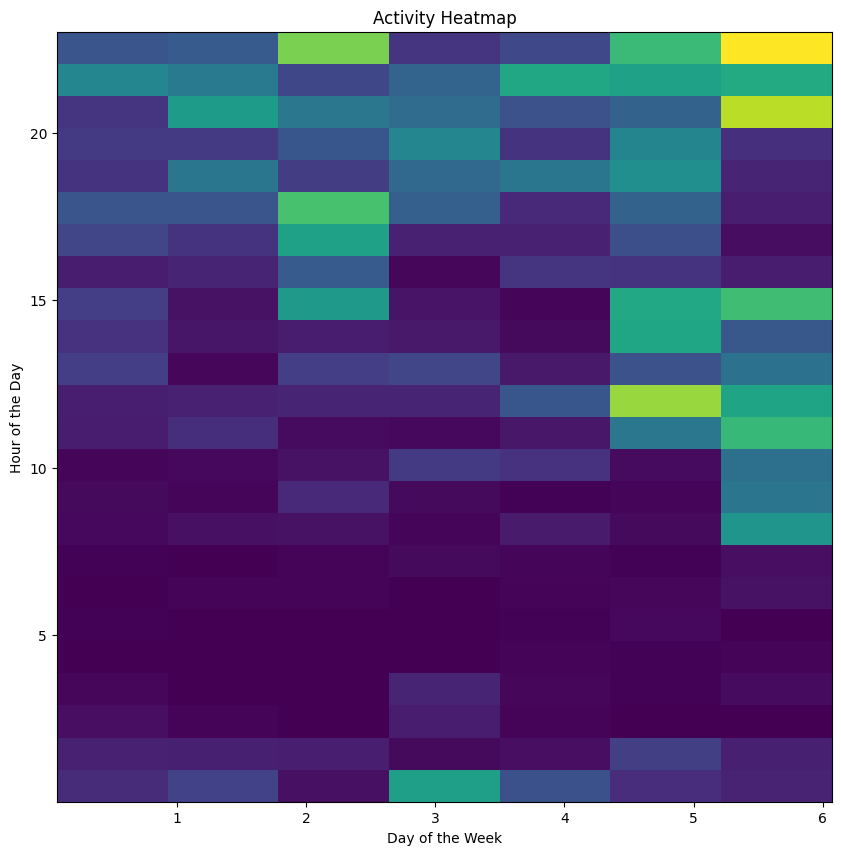

In [92]:
# Create a heatmap of the number of messages sent on each day of the week and hour of the day
heatmap, xedges, yedges = np.histogram2d(df['weekday'], df['hour'], bins=(7, 24))

# Create a grid of the x and y values
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5, yedges[:-1] + 0.5)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the heatmap
ax.pcolormesh(xpos, ypos, heatmap.T, cmap='viridis')

# Set the labels
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Hour of the Day')
ax.set_title('Activity Heatmap')
